# Simple tennis statistical scatter plot 

## 1. Introduction 
This project aims to produce a simple interactive scatter plot of ATP tennis player data using Python. The statistics of use will be 1. % of break points per service game, 2. % of break points per return game, which can be interpreted as measures of each player's service (advantage capitalisation) and return (defense-to-offense transition) game. The scatter plot will allow us to service/return traits of the top players and also players with similar game characteristics. A non-exhaustive list of interactive functions includes: <br>
- Tooltips indicating statistical values/ player nationality/ highest rank/ closest player based on euclidean distance  
- Tournament filters
- Yearly filters
- Surface filters 


## 2. Data exploration
Data has been sourced directly from http://www.ultimatetennisstatistics.com/ (stunning website by the way!) and copied straight to .txt/.csv format. 

In [153]:
#Imports 
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [154]:
#Read the file 
sBP_data = pd.read_csv('tennisBPpsg_1991_2020.csv').sort_values('name').reset_index(drop=True)
sBP_data.head() #inspect first 5 rows

,rank,name,country_name,country_id,active,value
0,167,Aaron Krickstein,United States,USA,False,0.626
1,226,Adrian Mannarino,France,FRA,True,0.595
2,165,Adrian Voinea,Romania,ROU,False,0.627
3,350,Agustin Calleri,Argentina,ARG,False,0.534
4,289,Albert Costa,Spain,ESP,False,0.565


In [155]:
#Check for null data
sBP_data.isnull().values.any()

False

In [156]:
rBP_data = pd.read_csv('tennisBPprg_1991_2020.csv').sort_values('name').reset_index(drop=True)
rBP_data.head() #inspect first 5 rows

,rank,name,country_name,country_id,active,value
0,35,Aaron Krickstein,United States,USA,False,0.677
1,293,Adrian Mannarino,France,FRA,True,0.532
2,236,Adrian Voinea,Romania,ROU,False,0.556
3,133,Agustin Calleri,Argentina,ARG,False,0.604
4,58,Albert Costa,Spain,ESP,False,0.652


In [157]:
rBP_data.isnull().values.any()

False

Each dataset contains the following information:
- ``Nat``: Nationality
- ``Name``: Name
- ``%BP per serve``: Percentage of break points per service game
- ``%BP per return``: Percentage of break points per return game
- ``Active Status``: Active ``True`` or Retired ``False``


In [170]:
#Merge the datasets
sBP_data['1-BP per serve']= 1-sBP_data['value']
merg_data = pd.concat([sBP_data, rBP_data['value']], axis=1)
merg_data.columns = ['rank', 'name', 'country_name', 'country_id', 'active', 'BP per service game', '1-BP per service game', 'BP per return game']
merg_data = merg_data.drop(['active'], axis=1)
merg_data.head()

,rank,name,country_name,country_id,BP per service game,1-BP per service game,BP per return game
0,167,Aaron Krickstein,United States,USA,0.626,0.374,0.677
1,226,Adrian Mannarino,France,FRA,0.595,0.405,0.532
2,165,Adrian Voinea,Romania,ROU,0.627,0.373,0.556
3,350,Agustin Calleri,Argentina,ARG,0.534,0.466,0.604
4,289,Albert Costa,Spain,ESP,0.565,0.435,0.652


## 3. Simple visualisation with matplotlib/seaborn

### 3.1 Label some notable players

In [8]:
# ATP top 2020 as of COVID-19 pause

df_20 = pd.read_csv('ATP_Rankings_2020.csv')

In [9]:
df_20.head()

,rank,name,country_name,country_id,points,bestRank,bestRankDate,rankDiff,pointsDiff,bestPoints
0,1,Novak Djokovic,Serbia,SRB,10220,1,2011-07-04,0,0,16950
1,2,Rafael Nadal,Spain,ESP,9850,1,2008-08-18,0,0,15390
2,3,Dominic Thiem,Austria,AUT,7045,3,2020-03-02,0,0,7045
3,4,Roger Federer,Switzerland,SUI,6630,1,2004-02-02,0,0,12315
4,5,Daniil Medvedev,Russian Federation,RUS,5890,4,2019-09-09,0,0,5960


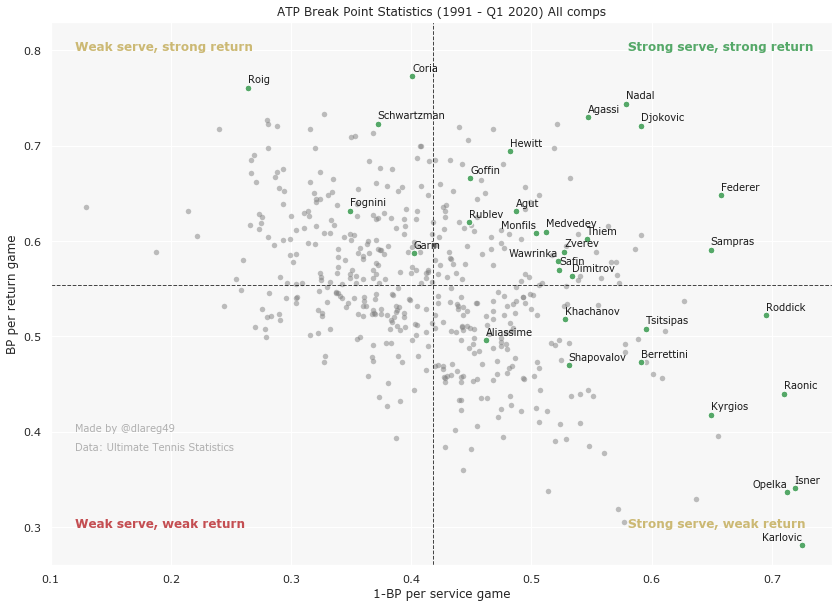

In [72]:
sns.set(font="Verdana")

fig1,ax1 = plt.subplots(figsize = (14,10))
ax1.set_facecolor('#f7f7f7')
ax1 =sns.scatterplot(x="1-BP per service game", y="BP per return game", data=merg_data, alpha=0.5, color='grey', linewidth=0, s=30)

# Dashed lines indicating mean values
ax1.plot([0.1,0.8],[np.mean(merg_data['BP per return game']),np.mean(merg_data['BP per return game'])], '--',  color='k', linewidth=1, alpha=0.8)
ax1.plot([np.mean(merg_data['1-BP per service game'])]*2, [0.25,0.83], '--',  color='k', linewidth=1, alpha=0.8)

# Plot margin limits
ax1.set_xlim([0.1,0.75])
ax1.set_ylim([0.26,0.83])

# Some text annotations
ax1.annotate('Weak serve, weak return',(0.12,0.3), fontsize=12, color='r', weight='bold')
ax1.annotate('Strong serve, weak return',(0.58,0.3), fontsize=12, color='y', weight='bold')
ax1.annotate('Weak serve, strong return',(0.12,0.8), fontsize=12, color='y', weight='bold')
ax1.annotate('Strong serve, strong return',(0.58,0.8), fontsize=12, color='g', weight='bold')

# Credits
ax1.annotate('Made by @dlareg49',(0.12,0.4), fontsize=10, color='grey', alpha=0.6)
ax1.annotate('Data: Ultimate Tennis Statistics',(0.12,0.38), fontsize=10, color='grey',alpha=0.6)

ax1.set(xlabel='common xlabel', ylabel='common ylabel')
ax1.set_xlabel('Time')

# Add in the ATP top 20 as filled scatter points
# And somemore 
df_20_names = list(df_20.name)+ ['John Isner', 'Ivo Karlovic', 'Nick Kyrgios', 'Andy Roddick',
                                 'Lleyton Hewitt', 'Marat Safin', 'Pete Sampras', 'Andre Agassi', 'Guillermo Coria',
                                'Milos Raonic','Reilly Opelka', 'Francisco Roig']

merg_data_20 = merg_data[merg_data['name'].isin(df_20_names)]
ax1 =sns.scatterplot(x="1-BP per service game", y="BP per return game", data=merg_data_20, alpha=1, color='g', linewidth=1, s=45)
# Player Names
for i in range(len(merg_data_20)):
    halign = 'left'
    if merg_data_20.name.iloc[i] in ['Gael Monfils','Ivo Karlovic', 'Reilly Opelka', 'Stan Wawrinka']:
        halign = 'right'
    ax1.annotate(merg_data_20.name.iloc[i].split(' ')[-1], (merg_data_20["1-BP per service game"].iloc[i],merg_data_20["BP per return game"].iloc[i]+0.003),
                 fontsize=10, horizontalalignment=halign, verticalalignment='bottom',color='k')
    
plt.title('ATP Break Point Statistics (1991 - Q1 2020) All comps')
plt.savefig('ATP BPpRG_vs_BPpSG.png')

## 4. Introduce some interactivity with bokeh 
The above plot is static and not very informative. Let's try out the bokeh library to introduce some interactive features to the scatter plot such as tooltips. <br>
**Note the plots get very messy and exploratory from here on**

In [73]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
#output_notebook()

In [10]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import Span
from bokeh.models import Label, LabelSet

source = ColumnDataSource(
        merg_data.to_dict('list')
    )

hover = HoverTool(
        tooltips=[
            ("Player","@name"),
            ("1-BP per SG", "@{1-BP per service game}"),
            ("BP per RG", "@{BP per return game}"),
            ("Active", "@active"),
        ]
    )

p = figure(plot_width=800, plot_height=500, tools=[hover], title="ATP Break Point Statistics (1991 - Q1 2020) All comps")

#Plot and label axes
scatter = p.circle('1-BP per service game', 'BP per return game', size=6, source=source,fill_alpha=0.05,hover_alpha=1)
p.xaxis.axis_label = '1-BP per service game'
p.yaxis.axis_label = 'BP per return game'

#Hide
#scatter.visible = False

#Plot some margins 
mean_BPpRG = Span(location=np.mean(merg_data['BP per return game']),
                            dimension='width', line_color='grey',
                            line_dash='dashed', line_width=1)

mean_BPpSG = Span(location=np.mean(merg_data['1-BP per service game']),
                            dimension='height', line_color='grey',
                            line_dash='dashed', line_width=1)

p.add_layout(mean_BPpSG)
p.add_layout(mean_BPpRG)

#Some text labels
ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                 text='Weak serve, weak return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                 text='Strong serve, weak return', 
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ul = Label(x=30, y=380, x_units='screen', y_units='screen',
                 text='Weak serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ur = Label(x=560, y=380, x_units='screen', y_units='screen',
                 text='Strong serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')

p.add_layout(ll)
p.add_layout(ul)
p.add_layout(lr)
p.add_layout(ur)

show(p)

In [11]:
#Let's label some prominent players
goats = ['Roger Federer','Rafael Nadal','Novak Djokovic','Pete Sampras','Andre Agassi','Ivan Lendl','John McEnroe']
big4 = ['Roger Federer','Rafael Nadal','Novak Djokovic','Andy Murray']
wNO1 = ['Roger Federer','Rafael Nadal','Novak Djokovic','Andy Murray', 'Andy Roddick', 'Juan Carlos Ferrero' , 'Lleyton Hewitt' \
       , 'Gustavo Kuerten', 'Marat Safin', 'Pat Rafter', 'Yevgeny Kafelnikov', 'Carlos Moya', 'Marcelo Rios', 'Thomas Muster' , 
       'Andre Agassi', 'Pete Sampras', 'Jim Courier', 'Boris Becker', 'Stefan Edberg', 'Mats Wilander', 'Ivan Lendl', 'John McEnroe']
tier2 = ['']
#Filter the DF to only include that list

df_big4 = merg_data[merg_data['name'].isin(big4)]
df_big4

,rank,name,country_name,country_id,active,BP per service game,1-BP per service game,BP per return game
46,429,Andy Murray,United Kingdom,GBR,True,0.479,0.521,0.723
362,475,Novak Djokovic,Serbia,SRB,True,0.409,0.591,0.721
395,470,Rafael Nadal,Spain,ESP,True,0.421,0.579,0.744
414,486,Roger Federer,Switzerland,SUI,True,0.342,0.658,0.648


Add some filtering and player searching features to the scatter plot. 

In [12]:
#More selections...
#AO winners 
AO = ['Stefan Edberg', 'Mats Wilander', 'Ivan Lendl', 'Boris Becker', 'Jim Courier', 'Pete Sampras', 'Andre Agassi', 'Petr Korda',
      'Yevgeny Kafelnikov', 'Thomas Johansson', 'Roger Federer', 'Marat Safin', 'Novak Djokovic', 'Rafael Nadal', 'Stan Wawrinka']
#FO 
FO = ['Ivan Lendl', 'Mats Wilander', 'Michael Chang', 'Andres Gomez', 'Jim Courier', 'Sergi Bruguera', 'Thomas Muster', 'Yevgeny Kafelnikov', 
     'Gustavo Kuerten', 'Carlos Moya', 'Andre Agassi', 'Albert Costa', 'Juan Carlos Ferrero', 'Gaston Gaudio', 'Rafael Nadal', 
     'Roger Federer', 'Stan Wawrinka', 'Novak Djokovic']

Wim = ['John McEnroe', 'Boris Becker', 'Pat Cash', 'Stefan Edberg', 'Michael Stich', 'Andre Agassi', 'Pete Sampras', 'Richard Krajicek', 
      'Goran Ivanisevic', 'Lleyton Hewitt', 'Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']

USO = ['John McEnroe', 'Ivan Lendl', 'Mats Wilander', 'Boris Becker', 'Pete Sampras', 'Stefan Edberg', 'Andre Agassi', 'Patrick Rafter', 
      'Marat Safin', 'Lleyton Hewitt', 'Andy Roddick', 'Roger Federer', 'Juan Martin Del Potro', 'Rafael Nadal', 'Novak Djokovic', 
      'Andy Murray', 'Marin Cilic', 'Stan Wawrinka']

## v2. Search + Filtered Selection (~2019). Search Bar can filter the selection widget results after "Enter" is pressed. But the selection to fill scatter point is not fixed here. 

In [13]:
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select

def modify_doc(doc):
    
    source = ColumnDataSource(merg_data.to_dict('list'))

    hover = HoverTool(
            tooltips=[
                ("Player","@name"),
                ("1-BP per SG", "@{1-BP per service game}"),
                ("BP per RG", "@{BP per return game}"),
                ("Active", "@active"),
            ]
        )

    p = figure(plot_width=800, plot_height=500, tools=[hover], title="ATP Break Point Statistics (1991-USO 2018) All comps")
    
    #Plot and label axes
    p.circle('1-BP per service game', 'BP per return game', size=6, source=source,fill_alpha=0.05,hover_alpha=1)
    p.xaxis.axis_label = '1-BP per service game'
    p.yaxis.axis_label = 'BP per return game'

    #Plot some margins 
    mean_BPpRG = Span(location=np.mean(merg_data['BP per return game']),
                                dimension='width', line_color='grey',
                                line_dash='dashed', line_width=1)

    mean_BPpSG = Span(location=np.mean(merg_data['1-BP per service game']),
                                dimension='height', line_color='grey',
                                line_dash='dashed', line_width=1)
    p.add_layout(mean_BPpSG)
    p.add_layout(mean_BPpRG)

    
    #Some text labels
    ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                     text='Weak serve, weak return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                     text='Strong serve, weak return', 
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                     text='Weak serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                     text='Strong serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    p.add_layout(ll)
    p.add_layout(ul)
    p.add_layout(lr)
    p.add_layout(ur)


    # Widgets
    # Filter/Fill some players according to groups
    playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])
    
    # Search function
    search = Select(options=source.data['name'])
    text_input = TextInput(placeholder='Enter name', title="Search:")
    
    
    #Store bunch of glpyhs here correspond to each group that can be selected
    #Big4
    big = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(big4)].to_dict('list')),
                   fill_alpha=0.9, color = 'crimson')
    #GOATS
    goat = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(goats)].to_dict('list')),
                    fill_alpha=0.9, color = 'darkorchid')
    #Ones
    ones = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(wNO1)].to_dict('list')),
                    fill_alpha=0.9, color = 'gold')

    #GS winners
    ao = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(AO)].to_dict('list')),
                  fill_alpha=0.9, color = 'steelblue')
    fo = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(FO)].to_dict('list')),
                  fill_alpha=0.9, color = 'coral')
    wim = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(Wim)].to_dict('list')),
                   fill_alpha=0.9, color = 'forestgreen')
    uso = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(USO)].to_dict('list')),
                   fill_alpha=0.9, color = 'dodgerblue')
    
    allgroups = [big, goat, ones, ao, fo, wim, uso]
    
    #Current selection
    singlesource = ColumnDataSource(merg_data[merg_data['name'].isin([])].to_dict('list'))
    curr_sel = p.circle('1-BP per service game', 'BP per return game', size=7, source=singlesource,fill_alpha=0.9, color = 'green')
    
    
    def update(): 
        
        for grp in allgroups:
            grp.visible = False
        grp_val = playerGroup.value
        group = pd.DataFrame(columns=['country_name', 'name', 'BP per service game', 'active', '1-BP per service game', 'BP per return game'])
        #Is there a better way to toggle through the layouts
        
        if (grp_val != "All"):
            if (grp_val == "Big 4"):
                val = big
            elif (grp_val == "GOATs"):
                val = goat
            elif (grp_val == "World #1s"):
                val = ones
            elif (grp_val == "AO winners"):
                val = ao
            elif (grp_val == "FO winners"):
                val = fo
            elif (grp_val == "Wim winners"):
                val = wim
            elif (grp_val == "USO winners"):
                val = uso
            
            for g in allgroups:
                if g == val:
                    g.visible = True
                elif g != val:
                    g.visible = False
    
    def update1(): #When the text input changes the select list
    
        #print (playerGroup.value)   #Test line to see if update is working
        search.options = merg_data[(merg_data.name.str.lower()).str.contains(text_input.value.lower())==True]['name'].tolist()
        searchval = search.options[0]
        print (searchval)
        
        
    def update2(): #When I select another play from the current select list 
        print (search.value)
    
    '''
    #Try JS callback to dynamically fill the selected name/ Pythonic method is very inefficient 
    callback = CustomJS(args={'circle': curr_sel.data_source, 'search': search.value}, code="""
            var sel_name = search;
            circle.data = merg_data[merg_data['Name'] == sel_name]
            ;
        """)
    '''
    
    playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()
    text_input.on_change("value", lambda attr, old, new: update1())
    search.on_change("value", lambda attr, old, new: update2())
    
    update() #Initial update to start at "All"
    
    # create a layout for everything
    #layout = column(playerGroup,p)
    
    l = layout([[playerGroup, text_input, search], [p],])

    # add the layout to curdoc
    doc.add_root(l)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

## v3. 2 Player Selection Widgets, selected player's scatter points are filled (working)

In [15]:
#from bokeh.plotting import output_file
from bokeh.embed import file_html
from bokeh.resources import CDN

In [208]:
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select

def modify_doc(doc):

    source = ColumnDataSource(merg_data.to_dict('list'))

    p = figure(plot_width=800, plot_height=500, title="ATP Break Point Statistics (1991-2020) All comps")
    
    #Plot and label axes
    all_points = p.circle('1-BP per service game', 'BP per return game', size=6, source=source,fill_alpha=0.05,hover_alpha=1, color='grey', hover_fill_color="green")
    p.xaxis.axis_label = '1-BP per service game'
    p.yaxis.axis_label = 'BP per return game'

    #Plot some margins 
    mean_BPpRG = Span(location=np.mean(merg_data['BP per return game']),
                                dimension='width', line_color='grey',
                                line_dash='dashed', line_width=1)

    mean_BPpSG = Span(location=np.mean(merg_data['1-BP per service game']),
                                dimension='height', line_color='grey',
                                line_dash='dashed', line_width=1)
    p.add_layout(mean_BPpSG)
    p.add_layout(mean_BPpRG)

    
    #Some text labels
    ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                     text='Weak serve, weak return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                     text='Strong serve, weak return', 
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                     text='Weak serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                     text='Strong serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    p.add_layout(ll)
    p.add_layout(ul)
    p.add_layout(lr)
    p.add_layout(ur)
    
    # Such that the Hover tool only acts on the 1st layer of data (all players). Won't repeat hover tips
    p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
        ('Player', '@name'),
        ('1-BP per SG', '@{1-BP per service game}'),
        ('BP per RG', '@{BP per return game}')], renderers=[all_points]))


    # Widgets
    # Filter/Fill some players according to groups
    playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])
    
    # Search functions
    search = Select(title="Select Player (1)", value='Select', options=['Select']+list(source.data['name']))
    search1 = Select(title="Select Player (2)", value='Select', options=['Select']+list(source.data['name']))
    #text_input = TextInput(placeholder='Enter name', title="Search:")
    
    
    
    #Store bunch of glpyhs here correspond to each group that can be selected
    #Big4
    big = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(big4)].to_dict('list')),
                   fill_alpha=0.9, color = 'crimson')
    #GOATS
    goat = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(goats)].to_dict('list')),
                    fill_alpha=0.9, color = 'darkorchid')
    #Ones
    ones = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(wNO1)].to_dict('list')),
                    fill_alpha=0.9, color = 'gold')

    #GS winners
    ao = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(AO)].to_dict('list')),
                  fill_alpha=0.9, color = 'steelblue')
    fo = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(FO)].to_dict('list')),
                  fill_alpha=0.9, color = 'coral')
    wim = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(Wim)].to_dict('list')),
                   fill_alpha=0.9, color = 'forestgreen')
    uso = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(USO)].to_dict('list')),
                   fill_alpha=0.9, color = 'dodgerblue')
    
    
    allgroups = [big, goat, ones, ao, fo, wim, uso]
    
    #Current selection
    # Dummy Djokovic just so the DF has entries to faciliate the patching  
    singlesource = ColumnDataSource(merg_data[merg_data['name'].isin(['Novak Djokovic'])].to_dict('list'))
    curr_sel = p.circle('1-BP per service game', 'BP per return game', size=7, source=singlesource,fill_alpha=1, color = 'green')
    curr_sel.visible = False
    # Select player (2)
    singlesource1 = ColumnDataSource(merg_data[merg_data['name'].isin(['Novak Djokovic'])].to_dict('list'))
    curr_sel1 = p.circle('1-BP per service game', 'BP per return game', size=7, source=singlesource1,fill_alpha=1, color = 'green')
    curr_sel1.visible = False
    
    
    def update(): 
        
        for grp in allgroups:
            grp.visible = False
        grp_val = playerGroup.value
        group = pd.DataFrame(columns=['country_name', 'name', 'BP per service game', 'active', '1-BP per service game', 'BP per return game'])
        #Is there a better way to toggle through the layouts
        
        if (grp_val != "All"):
            if (grp_val == "Big 4"):
                val = big
            elif (grp_val == "GOATs"):
                val = goat
            elif (grp_val == "World #1s"):
                val = ones
            elif (grp_val == "AO winners"):
                val = ao
            elif (grp_val == "FO winners"):
                val = fo
            elif (grp_val == "Wim winners"):
                val = wim
            elif (grp_val == "USO winners"):
                val = uso
            
            for g in allgroups:
                if g == val:
                    g.visible = True
                elif g != val:
                    g.visible = False
 
    def update2(): #When I select another play from the current select list 
        if search.value != 'Select':
            curr_sel.visible=True
            #print (search.value)
            #patches = merg_data[merg_data.name==search.value].to_dict('list')
            patches = {
            'rank': [(0, float(merg_data[merg_data.name==search.value]['rank']))],
            'name': [(0, str(merg_data[merg_data.name==search.value]['name']))],
            'country_name': [(0, str(merg_data[merg_data.name==search.value]['country_name']))],
            'country_id': [(0, str(merg_data[merg_data.name==search.value]['country_id']))],
            'BP per service game': [(0, float(merg_data[merg_data.name==search.value]['BP per service game']))] ,
            '1-BP per service game' : [ (0, float(merg_data[merg_data.name==search.value]['1-BP per service game'])) ],
            'BP per return game' : [ (0, float(merg_data[merg_data.name==search.value]['BP per return game'])) ],
            }
            singlesource.patch(patches)           
        else:
            curr_sel.visible = False
            
    def update3(): #When I select another play from the current select list 
        if search1.value != 'Select':
            curr_sel1.visible=True
            #print (search.value)
            #patches = merg_data[merg_data.name==search.value].to_dict('list')
            patches = {
            'rank': [(0, float(merg_data[merg_data.name==search1.value]['rank']))],
            'name': [(0, str(merg_data[merg_data.name==search1.value]['name']))],
            'country_name': [(0, str(merg_data[merg_data.name==search1.value]['country_name']))],
            'country_id': [(0, str(merg_data[merg_data.name==search1.value]['country_id']))],
            'BP per service game': [(0, float(merg_data[merg_data.name==search1.value]['BP per service game']))] ,
            '1-BP per service game' : [ (0, float(merg_data[merg_data.name==search1.value]['1-BP per service game'])) ],
            'BP per return game' : [ (0, float(merg_data[merg_data.name==search1.value]['BP per return game'])) ],
            }
            singlesource1.patch(patches)           
        else:
            curr_sel1.visible = False
    

    playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()
    #text_input.on_change("value", lambda attr, old, new: update1())
    search.on_change("value", lambda attr, old, new: update2())
    search1.on_change("value", lambda attr, old, new: update3())
    
    update() #Initial update to start at "All"
    
    # create a layout for everything
    #layout = column(playerGroup,p)
    
    l = layout([[playerGroup, search, search1], [p],])

    # add the layout to curdoc
    doc.add_root(l)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

## v4 Avoid using Python callbacks

In [254]:
from bokeh.models import CustomJS
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select
   
source_all = ColumnDataSource(merg_data.to_dict('list'))

p = figure(plot_width=800, plot_height=500, title="ATP Break Point Statistics (1991-2020) All comps")

#Plot and label axes
all_points = p.circle('1-BP per service game', 'BP per return game', size=6, source=source_all,fill_alpha=0.05,hover_alpha=1, color='grey', hover_fill_color="green")
p.xaxis.axis_label = '1-BP per service game'
p.yaxis.axis_label = 'BP per return game'

#Plot some margins 
mean_BPpRG = Span(location=np.mean(merg_data['BP per return game']),
                            dimension='width', line_color='grey',
                            line_dash='dashed', line_width=1)

mean_BPpSG = Span(location=np.mean(merg_data['1-BP per service game']),
                            dimension='height', line_color='grey',
                            line_dash='dashed', line_width=1)
p.add_layout(mean_BPpSG)
p.add_layout(mean_BPpRG)


#Some text labels
ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                 text='Weak serve, weak return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                 text='Strong serve, weak return', 
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                 text='Weak serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                 text='Strong serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
p.add_layout(ll)
p.add_layout(ul)
p.add_layout(lr)
p.add_layout(ur)

# Such that the Hover tool only acts on the 1st layer of data (all players). Won't repeat hover tips
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('Player', '@name'),
    ('1-BP per SG', '@{1-BP per service game}'),
    ('BP per RG', '@{BP per return game}')], renderers=[all_points]))


# Widgets
# Filter/Fill some players according to groups
playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])

#Store bunch of glpyhs here correspond to each group that can be selected
#Big4
big = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(big4)].to_dict('list')),
               fill_alpha=0.9, color = 'crimson')
#GOATS
goat = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(goats)].to_dict('list')),
                fill_alpha=0.9, color = 'darkorchid')
#Ones
ones = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(wNO1)].to_dict('list')),
                fill_alpha=0.9, color = 'gold')

#GS winners
ao = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(AO)].to_dict('list')),
              fill_alpha=0.9, color = 'steelblue')
fo = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(FO)].to_dict('list')),
              fill_alpha=0.9, color = 'coral')
wim = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(Wim)].to_dict('list')),
               fill_alpha=0.9, color = 'forestgreen')
uso = p.circle('1-BP per service game', 'BP per return game', size=7, source=ColumnDataSource(merg_data[merg_data['name'].isin(USO)].to_dict('list')),
               fill_alpha=0.9, color = 'dodgerblue')

allgroups = [big, goat, ones, ao, fo, wim, uso]


#Current selection
# Dummy Djokovic just so the DF has entries to faciliate the patching  
singlesource = ColumnDataSource({'rank': [],
                                 'name': [],
                                 'country_name': [],
                                 'country_id': [],
                                 'BP per service game': [],
                                 '1-BP per service game': [],
                                 'BP per return game': []})
singlesource1 = ColumnDataSource({'rank': [],
                                 'name': [],
                                 'country_name': [],
                                 'country_id': [],
                                 'BP per service game': [],
                                 '1-BP per service game': [],
                                 'BP per return game': []})
curr_sel = p.circle('1-BP per service game', 'BP per return game', size=7, source=singlesource,fill_alpha=1, color = 'lawngreen')
# Select player (2)
curr_sel1 = p.circle('1-BP per service game', 'BP per return game', size=7, source=singlesource1,fill_alpha=1, color = 'lawngreen')


def update(): 
    for grp in allgroups:
        grp.visible = False


code_grps = """
    var all_grps = [g1,g2,g3,g4,g5,g6,g7,g7];
    var f = cb_obj.value
    
    // Initialise and make hide all first 
    for (g=0; g<all_grps.length; g++) {
        all_grps[g].visible = false
    }
    
    switch (f){
        case "All":
            break;
        case "Big 4":
            g1.visible = true;
            break;
        case "GOATs":
            g2.visible = true;
            break;
        case "World #1s":
            g3.visible = true;
            break;
        case "AO winners":
            g4.visible = true;
            break;
        case "FO winners":
            g5.visible = true;
            break;
        case "Wim winners":
            g6.visible = true;
            break;
        case "USO winners":
            g7.visible = true;
            break;
    }
    
"""
           
code_up = """
    var data = s1.data;
    var all_data = s2.data;
    var f = cb_obj.value;   // The selected player name  
    
    data['rank'] = [];
    data['name'] = [];
    data['country_name'] = [];
    data['country_id'] = [];
    data['BP per service game'] = [];
    data['1-BP per service game'] = [];
    data['BP per return game'] = [];
    
    // Obtain the index of the selected player (f)
    var x;
    for (x=0; x<all_data['rank'].length; x++) {
        if (f == all_data['name'][x]) {
        break;
        }
    }
    
    data['rank'] = [all_data['rank'][x]];
    data['name'] = [f];
    data['country_name'] = [all_data['country_name'][x]];
    data['country_id'] = [all_data['country_id'][x]];
    data['BP per service game'] = [all_data['BP per service game'][x]];
    data['1-BP per service game'] = [all_data['1-BP per service game'][x]];
    data['BP per return game'] = [all_data['BP per return game'][x]];
    
    s1.change.emit();
"""

callback = CustomJS(args=dict(s1=singlesource, s2=source_all), code=code_up) 
callback1 = CustomJS(args=dict(s1=singlesource1, s2=source_all), code=code_up) 
#Test for the player groups
callgrp = CustomJS(args=dict(g1=big,g2=goat,g3=ones,g4=ao,g5=fo,g6=wim,g7=uso), code=code_grps)

#playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()

playerGroup.js_on_change("value", callgrp)

# Search functions
search = Select(title="Select Player (1)", value='Select', options=['Select']+list(source.data['name']))
search.js_on_change("value", callback)

search1 = Select(title="Select Player (2)", value='Select', options=['Select']+list(source.data['name']))
search1.js_on_change("value", callback1)

update() #Initial update to start at "All"


l = layout([[playerGroup, search, search1], [p],])
   
show(l) 


output_file("ATP BPpRG_vs_BPpSG.html", title="ATP BPpRG_vs_BPpSG")

## Another dataset (BP conversion)

In [255]:
#Somemore datasets

#BP conversion
BPcon_data = pd.read_csv('BPcon_1991_2020.csv').sort_values('name').reset_index(drop=True)
BPcon_data.head() #inspect first 5 rows

,rank,name,country_name,country_id,active,value
0,88,Aaron Krickstein,United States,USA,False,42.04%
1,98,Adrian Mannarino,France,FRA,True,41.88%
2,195,Adrian Voinea,Romania,ROU,False,40.52%
3,255,Agustin Calleri,Argentina,ARG,False,39.95%
4,162,Albert Costa,Spain,ESP,False,40.96%


In [256]:
BPcon_data['value_f'] = [np.round(float(x[:-1])/100.,3) for x in BPcon_data.value]

In [257]:
BPcon_data.head()

,rank,name,country_name,country_id,active,value,value_f
0,88,Aaron Krickstein,United States,USA,False,42.04%,0.420
1,98,Adrian Mannarino,France,FRA,True,41.88%,0.419
2,195,Adrian Voinea,Romania,ROU,False,40.52%,0.405
3,255,Agustin Calleri,Argentina,ARG,False,39.95%,0.400
4,162,Albert Costa,Spain,ESP,False,40.96%,0.410


In [16]:
len(BPcon_data)

548

In [19]:
BPcon_filt[BPcon_filt.name == 'Novak Djokovic']

,rank,name,country_name,country_id,active,value,value_f
362,12,Novak Djokovic,Serbia,SRB,True,44.47%,0.445


In [259]:
allPlayers = rBP_data['name'].tolist()
BPcon_filt = BPcon_data[BPcon_data.name.isin(allPlayers)].sort_values('name').reset_index(drop=True)

merg_data1 = pd.concat([rBP_data, BPcon_filt['value_f']], axis=1)
merg_data1.columns = ['rank', 'name', 'country_name', 'country_id', 'active', 'BP per return game', 'BP conversion']
merg_data1 = merg_data1.drop(['active'], axis=1)
merg_data1.head()


,rank,name,country_name,country_id,BP per return game,BP conversion
0,35,Aaron Krickstein,United States,USA,0.677,0.420
1,293,Adrian Mannarino,France,FRA,0.532,0.419
2,236,Adrian Voinea,Romania,ROU,0.556,0.405
3,133,Agustin Calleri,Argentina,ARG,0.604,0.400
4,58,Albert Costa,Spain,ESP,0.652,0.410


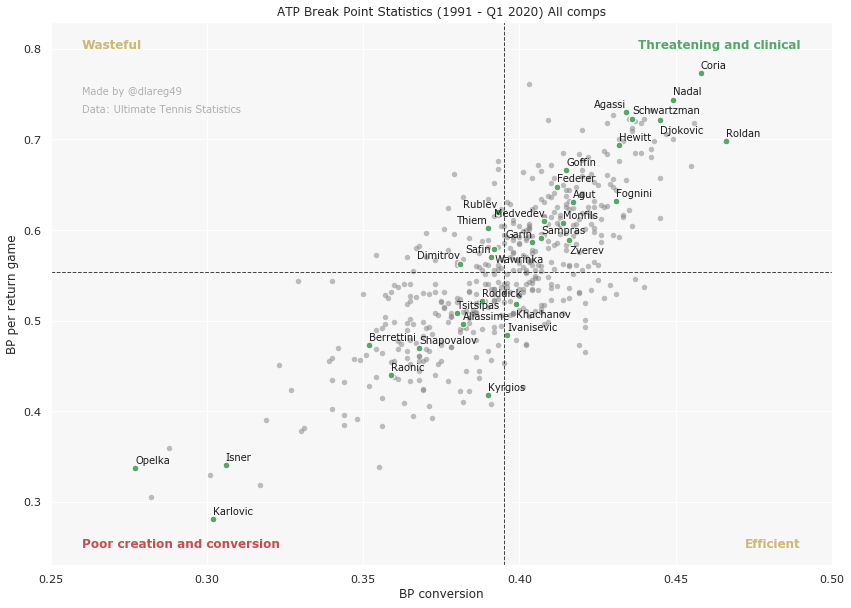

In [74]:
sns.set(font="Verdana")

fig2,ax2 = plt.subplots(figsize = (14,10))
ax2.set_facecolor('#f7f7f7')
ax2 =sns.scatterplot(x="BP conversion", y="BP per return game", data=merg_data1, alpha=0.5, color='grey', linewidth=0, s=30)

# Dashed lines indicating mean values
ax2.plot([0.25,0.5],[np.mean(merg_data1['BP per return game']),np.mean(merg_data1['BP per return game'])], '--',  color='k', linewidth=1, alpha=0.8)
ax2.plot([np.mean(merg_data1['BP conversion'])]*2, [0.23,0.83], '--',  color='k', linewidth=1, alpha=0.8)

# Plot margin limits
ax2.set_xlim([0.25,0.5])
ax2.set_ylim([0.23,0.83])

# Some text annotations
ax2.annotate('Poor creation and conversion',(0.26,0.25), fontsize=12, color='r', weight='bold')
ax2.annotate('Efficient',(0.49,0.25), fontsize=12, color='y', weight='bold', horizontalalignment='right')
ax2.annotate('Wasteful',(0.26,0.8), fontsize=12, color='y', weight='bold')
ax2.annotate('Threatening and clinical',(0.49,0.8), fontsize=12, color='g', weight='bold', horizontalalignment='right')

ax2.set_xlabel("BP conversion")
ax2.set_ylabel("BPs per return game")
plt.xlabel('Sepal Length')

# Credits
ax2.annotate('Made by @dlareg49',(0.26,0.75), fontsize=10, color='grey', alpha=0.6)
ax2.annotate('Data: Ultimate Tennis Statistics',(0.26,0.73), fontsize=10, color='grey',alpha=0.6)

# Add in the ATP top 20 as filled scatter points
# And somemore 
df_20_names = list(df_20.name)+ ['John Isner', 'Ivo Karlovic', 'Nick Kyrgios', 'Andy Roddick',
                                 'Lleyton Hewitt', 'Marat Safin', 'Pete Sampras', 'Andre Agassi', 'Guillermo Coria',
                                'Milos Raonic','Reilly Opelka', 'Guillermo Perez Roldan', 'Goran Ivanisevic']

merg_data1_20 = merg_data1[merg_data1['name'].isin(df_20_names)]
ax2 =sns.scatterplot(x="BP conversion", y="BP per return game", data=merg_data1_20, alpha=1, color='g', linewidth=1, s=45)
# Player Names
for i in range(len(merg_data1_20)):
    halign = 'left'
    valign = 'bottom'
    vshift = 0.003
    if merg_data1_20.name.iloc[i] in ['Marat Safin', 'Andre Agassi', 'Grigor Dimitrov', 'Christian Garin', 'Andrey Rublev', 'Dominic Thiem', 'Daniil Medvedev']:
        halign = 'right'
    if merg_data1_20.name.iloc[i] in ['Novak Djokovic', 'Stan Wawrinka', 'Alexander Zverev', 'Karen Khachanov']:
        valign = 'top'
        vshift = -vshift-0.003
    ax2.annotate(merg_data1_20.name.iloc[i].split(' ')[-1], (merg_data1_20["BP conversion"].iloc[i],merg_data1_20["BP per return game"].iloc[i]+vshift),
                 fontsize=10, horizontalalignment=halign, verticalalignment=valign,color='k')
    
plt.title('ATP Break Point Statistics (1991 - Q1 2020) All comps')
plt.savefig('ATP BPpRG_vs_BPcon.png')

In [261]:
from bokeh.models import CustomJS
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select
   
source_all = ColumnDataSource(merg_data1.to_dict('list'))

p = figure(plot_width=800, plot_height=500, title="ATP Break Point Statistics (1991-2020) All comps")

#Plot and label axes
all_points = p.circle('BP conversion', 'BP per return game', size=6, source=source_all,fill_alpha=0.05,hover_alpha=1, color='grey', hover_fill_color="green")
p.xaxis.axis_label = 'BP conversion'
p.yaxis.axis_label = 'BP per return game'

#Plot some margins 
mean_BPpRG = Span(location=np.mean(merg_data1['BP per return game']),
                            dimension='width', line_color='grey',
                            line_dash='dashed', line_width=1)

mean_BPpSG = Span(location=np.mean(merg_data1['BP conversion']),
                            dimension='height', line_color='grey',
                            line_dash='dashed', line_width=1)
p.add_layout(mean_BPpSG)
p.add_layout(mean_BPpRG)


#Some text labels
ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                 text='Poor creation and conversion',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                 text='Efficient', 
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                 text='Wasteful',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                 text='Threatening and clinical',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
p.add_layout(ll)
p.add_layout(ul)
p.add_layout(lr)
p.add_layout(ur)

# Such that the Hover tool only acts on the 1st layer of data (all players). Won't repeat hover tips
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('Player', '@name'),
    ('BP conversion', '@{BP conversion}'),
    ('BP per RG', '@{BP per return game}')], renderers=[all_points]))


# Widgets
# Filter/Fill some players according to groups
playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])

#Store bunch of glpyhs here correspond to each group that can be selected
#Big4
big = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(big4)].to_dict('list')),
               fill_alpha=0.9, color = 'crimson')
#GOATS
goat = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(goats)].to_dict('list')),
                fill_alpha=0.9, color = 'darkorchid')
#Ones
ones = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(wNO1)].to_dict('list')),
                fill_alpha=0.9, color = 'gold')

#GS winners
ao = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(AO)].to_dict('list')),
              fill_alpha=0.9, color = 'steelblue')
fo = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(FO)].to_dict('list')),
              fill_alpha=0.9, color = 'coral')
wim = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(Wim)].to_dict('list')),
               fill_alpha=0.9, color = 'forestgreen')
uso = p.circle('BP conversion', 'BP per return game', size=7, source=ColumnDataSource(merg_data1[merg_data1['name'].isin(USO)].to_dict('list')),
               fill_alpha=0.9, color = 'dodgerblue')


allgroups = [big, goat, ones, ao, fo, wim, uso]


#Current selection
# Dummy Djokovic just so the DF has entries to faciliate the patching  
singlesource = ColumnDataSource({'rank': [],
                                 'name': [],
                                 'country_name': [],
                                 'country_id': [],
                                 'BP per return game': [],
                                 'BP conversion': []})
singlesource1 = ColumnDataSource({'rank': [],
                                 'name': [],
                                 'country_name': [],
                                 'country_id': [],
                                 'BP per return game': [],
                                 'BP conversion': []})
curr_sel = p.circle('BP conversion', 'BP per return game', size=7, source=singlesource,fill_alpha=1, color = 'lawngreen')
# Select player (2)
curr_sel1 = p.circle('BP conversion', 'BP per return game', size=7, source=singlesource1,fill_alpha=1, color = 'lawngreen')


def update(): 
    for grp in allgroups:
        grp.visible = False


code_grps = """
    var all_grps = [g1,g2,g3,g4,g5,g6,g7,g7];
    var f = cb_obj.value
    
    // Initialise and make hide all first 
    for (g=0; g<all_grps.length; g++) {
        all_grps[g].visible = false
    }
    
    switch (f){
        case "All":
            break;
        case "Big 4":
            g1.visible = true;
            break;
        case "GOATs":
            g2.visible = true;
            break;
        case "World #1s":
            g3.visible = true;
            break;
        case "AO winners":
            g4.visible = true;
            break;
        case "FO winners":
            g5.visible = true;
            break;
        case "Wim winners":
            g6.visible = true;
            break;
        case "USO winners":
            g7.visible = true;
            break;
    }
    
"""
           
code_up = """
    var data = s1.data;
    var all_data = s2.data;
    var f = cb_obj.value;   // The selected player name  
    
    data['rank'] = [];
    data['name'] = [];
    data['country_name'] = [];
    data['country_id'] = [];
    data['BP conversion'] = [];
    data['BP per return game'] = [];
    
    // Obtain the index of the selected player (f)
    var x;
    for (x=0; x<all_data['rank'].length; x++) {
        if (f == all_data['name'][x]) {
        break;
        }
    }
    
    data['rank'] = [all_data['rank'][x]];
    data['name'] = [f];
    data['country_name'] = [all_data['country_name'][x]];
    data['country_id'] = [all_data['country_id'][x]];
    data['BP conversion'] = [all_data['BP conversion'][x]];
    data['BP per return game'] = [all_data['BP per return game'][x]];
    
    s1.change.emit();
"""

callback = CustomJS(args=dict(s1=singlesource, s2=source_all), code=code_up) 
callback1 = CustomJS(args=dict(s1=singlesource1, s2=source_all), code=code_up) 
#Test for the player groups
callgrp = CustomJS(args=dict(g1=big,g2=goat,g3=ones,g4=ao,g5=fo,g6=wim,g7=uso), code=code_grps)

#playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()

playerGroup.js_on_change("value", callgrp)

# Search functions
search = Select(title="Select Player (1)", value='Select', options=['Select']+list(source.data['name']))
search.js_on_change("value", callback)

search1 = Select(title="Select Player (2)", value='Select', options=['Select']+list(source.data['name']))
search1.js_on_change("value", callback1)

update() #Initial update to start at "All"


l1 = layout([[playerGroup, search, search1], [p],])
   

show(l1) 


#output_file("ATP BPpRG_vs_BPpSG.html", title="ATP BPpRG_vs_BPpSG")

## Tab the two plots together 

In [265]:
from bokeh.models.widgets import Panel, Tabs

tab1 = Panel(child=l, title="BP per return game vs 1-BP per service game")
tab2 = Panel(child=l1, title="BP per return game vs BP conversion")
    
tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)
output_file("Interactive ATP Break Points.html", title="Interactive ATP Break Points")

### Digression to actual work with the MJO metrics (12/6/2020) since Bokeh not installed on my NSCC env yet

In [139]:
mjo = pd.read_pickle('CMIP_MJO_EWRs')
mjo.head()

,Model,EWR
0,GPCP v1.3,2.728
1,ACCESS-CM2,1.656
2,ACCESS-ESM1-5,1.907
3,BCC-CSM2-MR,1.629
4,BCC-ESM1,2.563


In [141]:
from bokeh.plotting import output_file

output_file("CMIP6_MJO_EWR.html", title="MJO East/West Power Ratios")

source = ColumnDataSource(data=dict(Model=list(mjo.Model), EWR=list(mjo.EWR)))


hover = HoverTool(
        tooltips=[
            ("Model","@Model"),
            ("EWR", "@EWR"),
        ]
    )

p = figure(x_range=list(mjo.Model), plot_height=350, plot_width=800, tools=[hover], toolbar_location=None, title="MJO EWR (1995-2014, except GPCP 1997-2014)")
           
           
p.vbar(x='Model', top='EWR', width=0.9, source=source,
       line_color='white')

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 4

gpcp = Span(location=2.728,dimension='width', line_color='grey',
                            line_dash='dashed', line_width=1)

p.xaxis.major_label_orientation = np.pi/3
p.add_layout(gpcp)

show(p)